# Convolutional Neural Networks - Codealong

## Introduction

In this code-along, we will reinvestigate our previous Santa image classification example. To do this, we will review loading a dataset from a nested directory structure and building a baseline model. From there, we'll demonstrate building a CNN and demonstrate its improved performance on image recognition tasks. You are recommended to run the cells in order to further explore variables and investigate the code snippets themselves. However, please note that some cells (particularly training cells later on) may take some time to run. [On a Macbook pro the entire notebook took ~15 minutes to run.]

## Objectives  

You will be able to:
* Load data from a hierarchical directory structure
* Build a CNN for image recognition tasks

## Properly store your images

When you're analyzing your image data, file management is important. We will be using the santa images again, but this time, they are just stored in two folders: `santa` and `not_santa`, under. We want to work with a `train`, `validation` and `test` data set now, as we know by now that this is the best way to go. 

Let's import libraries `os` and `shutil`, as we'll need them to create the new folders and move the new files in there.

In [1]:
import os, shutil

Create three objects representing the existing directories 'data/santa/' as `data_santa_dir` and 'data/not_santa/' as `data_not_santa_dir`. We will create a new directory 'split/' as `new_dir`, where we will split the data set in three groups (or three subdirectories) 'train', 'test' and 'validation', each containing `santa` and `not_santa` subfolders. The final desired structure is represented below:

![title](images/folder_structure.png)

In [2]:
data_santa_dir = 'data/santa/'
data_not_santa_dir = 'data/not_santa/'
new_dir = 'split/'

You can use `os.listdir()` to create an object that stores all the relevant image names. 

In [3]:
imgs_santa = [file for file in os.listdir(data_santa_dir) if file.endswith('.jpg')]

In [4]:
imgs_santa[0:10]

['00000440.jpg',
 '00000043.jpg',
 '00000029.jpg',
 '00000160.jpg',
 '00000064.jpg',
 '00000120.jpg',
 '00000278.jpg',
 '00000109.jpg',
 '00000165.jpg',
 '00000283.jpg']

Let's see how many images there are in the 'santa' directory.

In [5]:
print('There are',len(imgs_santa), 'santa images')

There are 461 santa images


Now, repeat this for the 'not_santa' directory

In [6]:
imgs_not_santa = [file for file in os.listdir(data_not_santa_dir) if file.endswith('.jpg')]

In [7]:
print('There are', len(imgs_not_santa), 'images without santa')

There are 461 images without santa


Create all the folders and subfolder in order to get the structure represented above. You can use `os.path.join` to create strings that will be used later on to generate new directories.

In [15]:
# # os.mkdir(new_dir)
# os.listdir()

In [16]:
train_folder = os.path.join(new_dir, 'train')
train_santa = os.path.join(train_folder, 'santa')
train_not_santa = os.path.join(train_folder, 'not_santa')

test_folder = os.path.join(new_dir, 'test')
test_santa = os.path.join(test_folder, 'santa')
test_not_santa = os.path.join(test_folder, 'not_santa')

val_folder = os.path.join(new_dir, 'validation')
val_santa = os.path.join(val_folder, 'santa')
val_not_santa = os.path.join(val_folder, 'not_santa')

In [17]:
train_santa

'split/train/santa'

Now use all the path strings you created to make new directories. You can use `os.mkdir()` to do this. Go have a look at your directory and see if this worked!

In [21]:
!ls split/test


not_santa  santa


In [22]:
# os.mkdir(test_folder)
# os.mkdir(test_santa)
# os.mkdir(test_not_santa)

# os.mkdir(train_folder)
# os.mkdir(train_santa)
# os.mkdir(train_not_santa)

# os.mkdir(val_folder)
# os.mkdir(val_santa)
# os.mkdir(val_not_santa)

Copy the Santa images in the three santa subfolders. Let's put the first 271 images in the training set, the next 100 images in the validation set and the final 90 images in the test set.

In [23]:
# train santa
imgs = imgs_santa[:271]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(train_santa, img)
    shutil.copyfile(origin, destination)

In [24]:
# validation santa
imgs = imgs_santa[271:371]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(val_santa, img)
    shutil.copyfile(origin, destination)

In [25]:
# test santa
imgs = imgs_santa[371:]
for img in imgs:
    origin = os.path.join(data_santa_dir, img)
    destination = os.path.join(test_santa, img)
    shutil.copyfile(origin, destination)

Now, repeat all this for the 'not_santa' images!

In [26]:
# train not_santa
imgs = imgs_not_santa[:271]
for img in imgs:
    origin = os.path.join(data_not_santa_dir, img)
    destination = os.path.join(train_not_santa, img)
    shutil.copyfile(origin, destination)
# validation not_santa
imgs = imgs_not_santa[271:371]
for img in imgs:
    origin = os.path.join(data_not_santa_dir, img)
    destination = os.path.join(val_not_santa, img)
    shutil.copyfile(origin, destination)
# test not_santa
imgs = imgs_not_santa[371:]
for img in imgs:
    origin = os.path.join(data_not_santa_dir, img)
    destination = os.path.join(test_not_santa, img)
    shutil.copyfile(origin, destination)

Let's print out how many images we have in each directory so we know for sure our numbers are right!

In [27]:
print('There are', len(os.listdir(train_santa)), 'santa images in the training set')

There are 375 santa images in the training set


In [28]:
print('There are', len(os.listdir(val_santa)), 'santa images in the validation set')

There are 174 santa images in the validation set


In [29]:
print('There are', len(os.listdir(test_santa)), 'santa images in the test set')

There are 154 santa images in the test set


In [30]:
print('There are', len(os.listdir(train_not_santa)), 'images without santa in the train set')

There are 376 images without santa in the train set


In [31]:
print('There are', len(os.listdir(val_not_santa)), 'images without santa in the validation set')

There are 174 images without santa in the validation set


In [32]:
print('There are', len(os.listdir(test_not_santa)), 'images without santa in the test set')

There are 153 images without santa in the test set


## Use a densely connected network as a baseline

Now that we've sorted our data, we can easily use Keras' module with image-processing tools. Let's import the necessary libraries below. 

In [39]:
!pip install Pillow
import time
import matplotlib.pyplot as plt
import scipy
import numpy as np
from PIL import Image
from scipy import ndimage
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

np.random.seed(123)

You are using pip version 10.0.1, however version 19.1.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [40]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), batch_size = 180) 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64), batch_size = 200)

# get all the data in the directory split/train (542 images), and reshape them
train_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        train_folder, 
        target_size=(64, 64), batch_size=542)

Found 307 images belonging to 2 classes.
Found 348 images belonging to 2 classes.
Found 751 images belonging to 2 classes.


In [41]:
# create the data sets
train_images, train_labels = next(train_generator)
test_images, test_labels = next(test_generator)
val_images, val_labels = next(val_generator)

In [42]:
# Explore your dataset again
m_train = train_images.shape[0]
num_px = train_images.shape[1]
m_test = test_images.shape[0]
m_val = val_images.shape[0]

print ("Number of training samples: " + str(m_train))
print ("Number of testing samples: " + str(m_test))
print ("Number of validation samples: " + str(m_val))
print ("train_images shape: " + str(train_images.shape))
print ("train_labels shape: " + str(train_labels.shape))
print ("test_images shape: " + str(test_images.shape))
print ("test_labels shape: " + str(test_labels.shape))
print ("val_images shape: " + str(val_images.shape))
print ("val_labels shape: " + str(val_labels.shape))

Number of training samples: 542
Number of testing samples: 180
Number of validation samples: 200
train_images shape: (542, 64, 64, 3)
train_labels shape: (542, 2)
test_images shape: (180, 64, 64, 3)
test_labels shape: (180, 2)
val_images shape: (200, 64, 64, 3)
val_labels shape: (200, 2)


In [43]:
train_img = train_images.reshape(train_images.shape[0], -1)
test_img = test_images.reshape(test_images.shape[0], -1)
val_img = val_images.reshape(val_images.shape[0], -1)

print(train_img.shape)
print(test_img.shape)
print(val_img.shape)

(542, 12288)
(180, 12288)
(200, 12288)


In [44]:
train_y = np.reshape(train_labels[:,0], (542,1))
test_y = np.reshape(test_labels[:,0], (180,1))
val_y = np.reshape(val_labels[:,0], (200,1))

In [45]:
from keras import models
from keras import layers
np.random.seed(123)
model = models.Sequential()
model.add(layers.Dense(20, activation='relu', input_shape=(12288,))) #2 hidden layers
model.add(layers.Dense(7, activation='relu'))
model.add(layers.Dense(5, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [46]:
model.compile(optimizer='sgd',
              loss='binary_crossentropy',
              metrics=['accuracy'])

histoire = model.fit(train_img,
                    train_y,
                    epochs=50,
                    batch_size=32,
                    validation_data=(val_img, val_y))

Train on 542 samples, validate on 200 samples
Epoch 1/50
542/542 [==============================] - 0s 481us/step - loss: 0.6989 - acc: 0.5406 - val_loss: 0.6876 - val_acc: 0.6000
Epoch 2/50
542/542 [==============================] - 0s 221us/step - loss: 0.6785 - acc: 0.5646 - val_loss: 0.6872 - val_acc: 0.5950
Epoch 3/50
542/542 [==============================] - 0s 215us/step - loss: 0.6647 - acc: 0.5517 - val_loss: 0.6654 - val_acc: 0.7000
Epoch 4/50
542/542 [==============================] - 0s 278us/step - loss: 0.6592 - acc: 0.6052 - val_loss: 0.6453 - val_acc: 0.7050
Epoch 5/50
542/542 [==============================] - 0s 212us/step - loss: 0.6399 - acc: 0.6458 - val_loss: 0.6057 - val_acc: 0.6900
Epoch 6/50
542/542 [==============================] - 0s 225us/step - loss: 0.6052 - acc: 0.7030 - val_loss: 0.5768 - val_acc: 0.6300
Epoch 7/50
542/542 [==============================] - 0s 291us/step - loss: 0.6417 - acc: 0.6421 - val_loss: 0.6230 - val_acc: 0.7050
Epoch 8/50
542/5

In [47]:
results_train = model.evaluate(train_img, train_y)

542/542 [==============================] - 0s 69us/step


In [48]:
results_test = model.evaluate(test_img, test_y)

180/180 [==============================] - 0s 76us/step


In [ ]:
results_train

[0.19454749401425084, 0.9225092253121943]

In [ ]:
results_test

[0.4695923460854424, 0.8]

Remember that, in our previous lab on building deeper neural networks from scratch, we obtained a training accuracy of 95%, and a test set accuracy of 74.23%.

This result is similar to what we got building our manual "deeper" dense model. The results are not entirely different. This is not a surprise!
- Before, we only had a training and a validation set (which was at the same time the test set). Now we have split up the data 3-ways.
- We didn't use minibatches before, yet we used mini-batches of 32 units here.


## Convnet

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer="sgd",
              metrics=['acc'])

In [ ]:
history = model.fit(train_images,
                    train_y,
                    epochs=30,
                    batch_size=32,
                    validation_data=(val_images, val_y))

Train on 542 samples, validate on 200 samples
Epoch 1/30
542/542 [==============================] - 6s 10ms/step - loss: 0.6857 - acc: 0.4926 - val_loss: 0.6716 - val_acc: 0.5200
Epoch 2/30
542/542 [==============================] - 5s 10ms/step - loss: 0.6761 - acc: 0.4852 - val_loss: 0.6667 - val_acc: 0.5450
Epoch 3/30
542/542 [==============================] - 5s 10ms/step - loss: 0.6677 - acc: 0.5037 - val_loss: 0.6538 - val_acc: 0.5350
Epoch 4/30
542/542 [==============================] - 5s 9ms/step - loss: 0.6580 - acc: 0.5295 - val_loss: 0.6451 - val_acc: 0.6150
Epoch 5/30
542/542 [==============================] - 6s 10ms/step - loss: 0.6472 - acc: 0.6107 - val_loss: 0.6324 - val_acc: 0.6650
Epoch 6/30
542/542 [==============================] - 5s 9ms/step - loss: 0.6345 - acc: 0.6347 - val_loss: 0.6253 - val_acc: 0.8450
Epoch 7/30
542/542 [==============================] - 6s 10ms/step - loss: 0.6181 - acc: 0.7232 - val_loss: 0.6011 - val_acc: 0.8000
Epoch 8/30
542/542 [=====

In [ ]:
results_train = model.evaluate(train_images, train_y)

542/542 [==============================] - 2s 3ms/step


In [ ]:
results_test = model.evaluate(test_images, test_y)

180/180 [==============================] - 1s 4ms/step


In [ ]:
results_train

[0.19192493093849547, 0.9298892991129323]

In [ ]:
results_test

[0.2538859986596637, 0.9111111097865634]

## Data Augmentation

ImageDataGenerator becomes really useful when we *actually* want to generate more data. We'll show you how this works.

In [ ]:
train_datagen= ImageDataGenerator(rescale=1./255, 
     rotation_range=40,
     width_shift_range=0.2,
     height_shift_range=0.2,
     shear_range=0.3,
     zoom_range=0.1,
     horizontal_flip = False)

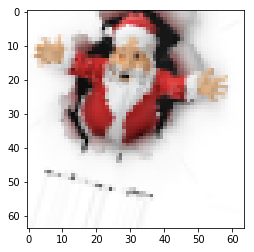

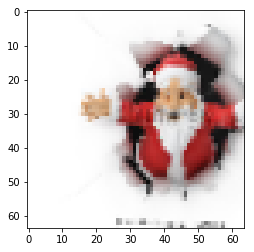

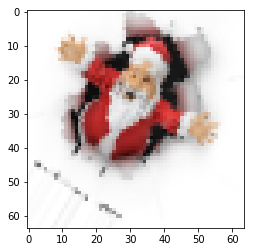

In [ ]:
names = [os.path.join(train_santa, name) for name in os.listdir(train_santa)]
img_path = names[91]
img = load_img(img_path, target_size=(64, 64))

reshape_img = img_to_array(img) 
reshape_img = reshape_img.reshape((1,) + reshape_img.shape) 
i=0
for batch in train_datagen.flow(reshape_img, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(array_to_img(batch[0]))
    i += 1
    if i % 3 == 0:
        break
plt.show()

In [ ]:
# get all the data in the directory split/test (180 images), and reshape them
test_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        test_folder, 
        target_size=(64, 64), 
        batch_size = 180,
        class_mode='binary') 

# get all the data in the directory split/validation (200 images), and reshape them
val_generator = ImageDataGenerator(rescale=1./255).flow_from_directory(
        val_folder, 
        target_size=(64, 64),
        batch_size = 32,
        class_mode='binary')

# get all the data in the directory split/train (542 images), and reshape them
train_generator = train_datagen.flow_from_directory(
        train_folder, 
        target_size=(64, 64), 
        batch_size = 32, 
        class_mode='binary')

Found 307 images belonging to 2 classes.
Found 348 images belonging to 2 classes.
Found 751 images belonging to 2 classes.


In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(64 ,64,  3)))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (4, 4), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer= 'sgd',
              metrics=['acc'])

In [ ]:
history_2 = model.fit_generator(
      train_generator,
      steps_per_epoch=25,
      epochs=30,
      validation_data=val_generator,
      validation_steps=25)

Epoch 1/30
25/25 [==============================] - 29s 1s/step - loss: 0.6851 - acc: 0.4977 - val_loss: 0.6776 - val_acc: 0.5000
Epoch 2/30
25/25 [==============================] - 30s 1s/step - loss: 0.6787 - acc: 0.5026 - val_loss: 0.6710 - val_acc: 0.5000
Epoch 3/30
25/25 [==============================] - 27s 1s/step - loss: 0.6733 - acc: 0.4988 - val_loss: 0.6642 - val_acc: 0.5000
Epoch 4/30
25/25 [==============================] - 31s 1s/step - loss: 0.6648 - acc: 0.5121 - val_loss: 0.6576 - val_acc: 0.5000
Epoch 5/30
25/25 [==============================] - 28s 1s/step - loss: 0.6594 - acc: 0.5048 - val_loss: 0.6457 - val_acc: 0.5144
Epoch 6/30
25/25 [==============================] - 28s 1s/step - loss: 0.6488 - acc: 0.5402 - val_loss: 0.6305 - val_acc: 0.5374
Epoch 7/30
25/25 [==============================] - 29s 1s/step - loss: 0.6326 - acc: 0.5778 - val_loss: 0.6138 - val_acc: 0.5460
Epoch 8/30
25/25 [==============================] - 27s 1s/step - loss: 0.6200 - acc: 0.63

In [ ]:
test_x, test_y = next(test_generator)

In [ ]:
results_test = model.evaluate(test_x, test_y)

In [ ]:
results_test

## Summary  

In this code along lab, we looked again at some of the preprocessing techniques needed in order to organize our data prior to building a model using Keras. Afterwards, we investigated new code in order to build a CNN for image recognition.